We can do a lot of cool things with Python like making interactive dashboards, scraping information from websites, automating tasks on your computer, and even controlling things in the physical world (with help from a mini computer or microprocessor like Raspberry Pis and Arduinos!). We're going to review some basic data analysis tools that can help you do better and faster analysis, and that can help in your careers. 

Like anything, it takes a while to learn a new skill (think of learning Python like learning a foreign language), so you won't be a Python data expert by the end of these workshops--sorry! But, this should give you an idea of what you can do with Python, and where to find some more resources should you decide to take on learning more of it later!

We'll be working in Google Collaboratory notebooks for these sessions because it's the easiest way to write and do things in Python without needing to download any software, but there are a ton of different code text editors that you can download onto your desktop. I recommend downloading [Anaconda](https://www.anaconda.com/download/#macos), which is a virtual environment that's essentially preloaded with the most common tools that you'll need to do a lot of things with Python.

We'll be using data from the Baltimore City Open Data website for this class at https://data.baltimorecity.gov

This website holds all of the open data produced by Baltimore City government and related organizations (basically everything that is public information including, police arrests, 311 calls, red light camera citations, Baltimore City government employee salaries, vacant housing data, property tax information, etc.). If you're going to use some of this for anything, be sure to check the date that the dataset was last updated, to make sure you conduct an accurate analysis--if it's not up to date, you can make a request to the Baltimore City Department of Information & Technology to update it! 

We'll first get an idea of how we can look at data in Python with the Baltimore City Parking Citation dataset available here: https://data.baltimorecity.gov/Transportation/Parking-Citations/n4ma-fj3m

In [0]:
# in order to look at our dataset, we need to tell Python that we want to do something with data
# so we need to import a package that helps us unpack the infomation into a readable and editable format

# we do this by importing a package called pandas (the name derived from "panel data"--not the animal :) )

import pandas as pd

# we'll also import another package that'll help us graph later, called seaborn
import seaborn as sns
import matplotlib.pyplot as plt

melanie's note

We import pandas as pd so that when we reference pandas in our code, we can write "pd" instead of "pandas" every time we need to reference the library. You can technically just write "import pandas," but then you're prone to more errors (typing more characters)

In [51]:
# next, we need to install and import a library that'll help us interact with the Open Baltimore webiste

!pip install sodapy

This next bit of code allows us to interact with the Baltimore City  Open Data API (Application Programming Interface). This means we can interact with this data real time--or whenever it's updated on the website. 

In [0]:
from sodapy import Socrata

In [53]:
client = Socrata("data.baltimorecity.gov", None)

In [0]:
results = client.get("2ddy-2uzt", limit=2000)

Now, we preview our data by setting our dataframe to equal df

In [0]:
df = pd.DataFrame.from_records(results)

In [57]:
df.head(10)

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,neighborhood,noticedate,openfine,openpenalty,policedistrict,state,tag,violcode,violdate,violfine
0,40.00,13842141,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,300 MLK JR. BOULEVARD S/B,NaN,300 MLK JR BOULEVARD S,...,NaN,2012-09-17T20:00:00.000,40.00,0.00,NaN,MD,4AK4181,032,2012-07-04T16:36:00.000,40.00
1,0,00973941,NaN,Less Than 15 feet from Fire Hydrant,06,18,2017-05-05T04:01:00.000,3200 MCELDERRY,"{u'type': u'Point', u'coordinates': [-76.57206...",3200 MCELDERRY,...,NaN,NaN,77,0,NaN,MD,5BN7673,017,2017-04-06T08:40:00.000,77
2,40.00,13850284,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,2800 BLOCK OF POTEE ST. S/B,NaN,2800 BLOCK OF POTEE ST S,...,NaN,2012-09-17T20:00:00.000,40.00,0.00,NaN,MD,5AR2438,032,2012-07-04T19:39:00.000,40.00
3,0,01202142,7,Expired Tags,06,17,2018-02-15T04:02:00.000,1800 N PAYSON ST,"{u'type': u'Point', u'coordinates': [-76.64983...",1800 N PAYSON ST,...,Easterwood,NaN,32,0,Western,MD,5CX1465,022,2018-02-09T12:45:00.000,32
4,40.00,13849427,NaN,Fixed Speed Camera,02,2,2013-05-07T10:41:00.000,2800 BLOCK OF LOCH RAVEN BLVD,NaN,2800 BLOCK OF LOCH RAVEN BLVD,...,NaN,2012-11-28T19:00:00.000,40.00,0.00,NaN,VA,XAX6304,032,2012-07-04T19:14:00.000,40.00
5,0,01374776,NaN,No Stopping/Standing Tow Away Zone,04,18,2018-01-23T04:04:00.000,8 CLUB ROAD,"{u'type': u'Point', u'coordinates': [-76.63754...",8 CLUB ROAD,...,NaN,NaN,52,0,NaN,MD,2AR3245,008,2017-12-20T19:35:00.000,52
6,0,01478791,NaN,Expired Tags,07,16,2017-02-18T04:01:00.000,1006 S CHARLES ST,"{u'type': u'Point', u'coordinates': [-76.61444...",1006 S CHARLES ST,...,NaN,NaN,32,0,NaN,MD,4BP5148,022,2017-01-29T18:40:00.000,32
7,0,01616010,NaN,Expired Tags,07,17,2017-09-02T04:02:00.000,3400 COTWOOD PLC,"{u'type': u'Point', u'coordinates': [-76.65665...",3400 COTWOOD,...,NaN,NaN,32,0,NaN,MD,8CJ6079,022,2017-08-20T17:23:00.000,32
8,0,83755265,NaN,Fixed Speed Camera,09,18,2018-07-07T04:18:00.000,4300 BLK ERDMAN AVE SB,NaN,NaN,...,NaN,NaN,0,0,NaN,MD,7CM8004,032,2018-06-25T08:11:00.000,40
9,40.00,13880042,NaN,Mobile Speed Camera,02,14,2013-05-07T10:41:00.000,2800 BLOCK OF ORLEANS ST W/B,NaN,2800 BLOCK OF ORLEANS ST W,...,NaN,2012-08-27T20:00:00.000,40.00,0.00,NaN,MD,1AP6075,033,2012-07-03T14:28:00.000,40.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
balance               2000 non-null object
citation              2000 non-null object
councildistrict       61 non-null object
description           2000 non-null object
expmm                 1908 non-null object
expyy                 2000 non-null object
importdate            2000 non-null object
location              2000 non-null object
location_2            263 non-null object
location_2_address    1870 non-null object
location_2_city       1878 non-null object
location_2_state      1878 non-null object
make                  1997 non-null object
neighborhood          61 non-null object
noticedate            1121 non-null object
openfine              2000 non-null object
openpenalty           2000 non-null object
policedistrict        61 non-null object
state                 2000 non-null object
tag                   2000 non-null object
violcode              2000 non-null obje

In [11]:
df.columns.tolist()

[u'balance',
 u'citation',
 u'councildistrict',
 u'description',
 u'expmm',
 u'expyy',
 u'importdate',
 u'location',
 u'location_2',
 u'location_2_address',
 u'location_2_city',
 u'location_2_state',
 u'make',
 u'neighborhood',
 u'noticedate',
 u'openfine',
 u'openpenalty',
 u'policedistrict',
 u'state',
 u'tag',
 u'violcode',
 u'violdate',
 u'violfine']

In [59]:
df.make

0         BMW
1        TOYT
2        MITS
3        FORD
4        STRN
5         BMW
6        MITS
7        HYUN
8        SUBA
9        HYUN
10       FORD
11        BMW
12        KIA
13        BMW
14      CHRYS
15      TOYOT
16       HOND
17       JEEP
18        GMC
19       HOND
20       MAZD
21       SUBA
22       CHEV
23       CHEV
24       HYUN
25       HOND
26       TOYT
27       DODG
28       NISS
29        GMC
        ...  
1970    TOYOT
1971     JEEP
1972     FORD
1973     FORD
1974     MITS
1975     ACUR
1976     HOND
1977    ACURA
1978     CHEV
1979     CHEV
1980     DODG
1981     FORD
1982     CHEV
1983     HOND
1984     FORD
1985     HYUN
1986     CADI
1987     TOYT
1988      BMW
1989     FORD
1990    CHEVR
1991     DODG
1992     INFI
1993    MERCE
1994     FORD
1995     HOND
1996     NWFL
1997     NISS
1998    ACURA
1999     DODG
Name: make, Length: 2000, dtype: object

In [62]:
df.make.unique().tolist()

[u'BMW',
 u'TOYT',
 u'MITS',
 u'FORD',
 u'STRN',
 u'HYUN',
 u'SUBA',
 u'KIA',
 u'CHRYS',
 u'TOYOT',
 u'HOND',
 u'JEEP',
 u'GMC',
 u'MAZD',
 u'CHEV',
 u'DODG',
 u'NISS',
 u'CHRY',
 u'ACURA',
 u'MERC',
 u'CADIL',
 u'VOLV',
 u'CADI',
 u'JAGU',
 nan,
 u'ACUR',
 u'BUICK',
 u'HON',
 u'SIENN',
 u'MERZ',
 u'BUIC',
 u'NISSA',
 u'LEXUS',
 u'PLYM',
 u'LEXS',
 u'VOLK',
 u'MINI-',
 u'AUDI',
 u'EAGL',
 u'MACK',
 u'KW',
 u'LINC',
 u'VOLKS',
 u'INFI',
 u'CHEVR',
 u'HONDA',
 u'VOLVO',
 u'INFIN',
 u'UNK',
 u'SATU',
 u'RANGE',
 u'PONT',
 u'INTER',
 u'SATUR',
 u'LEXU',
 u'PONTI',
 u'LAND',
 u'NFUS',
 u'CAD',
 u'MERCE',
 u'OLDSM',
 u'STOU',
 u'HYUND',
 u'JEE',
 u'LINCO',
 u'DODGE',
 u'SUZI',
 u'MERCU',
 u'LNDR',
 u'BUCK',
 u'MINI',
 u'SCION',
 u'MITSU',
 u'PORSH',
 u'MAZDA',
 u'STER',
 u'MASE',
 u'SCIO',
 u'LEX',
 u'ISU',
 u'PORS',
 u'RANG',
 u'MB.',
 u'DETAC',
 u'SUBAR',
 u'ISUZ',
 u'OLDS',
 u'TRAIL',
 u'SUZU',
 u'OLD',
 u'PORSC',
 u'NABI',
 u'SMAR',
 u'UTILI',
 u'PTRB',
 u'STAR',
 u'HUMM',
 u'MNNI',
 u'R

In [17]:
df.make.nunique()

102

Let's try and organize this data in some way. 

We'll first look at the data organized by dates to see if we find any patterns. To do this, we'll need to convert our date column **datatype** into a datetime format:

In [0]:
df['violdate'] = pd.to_datetime(df['violdate'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
balance               2000 non-null object
citation              2000 non-null object
councildistrict       61 non-null object
description           2000 non-null object
expmm                 1908 non-null object
expyy                 2000 non-null object
importdate            2000 non-null object
location              2000 non-null object
location_2            263 non-null object
location_2_address    1870 non-null object
location_2_city       1878 non-null object
location_2_state      1878 non-null object
make                  1997 non-null object
neighborhood          61 non-null object
noticedate            1121 non-null object
openfine              2000 non-null object
openpenalty           2000 non-null object
policedistrict        61 non-null object
state                 2000 non-null object
tag                   2000 non-null object
violcode              2000 non-null obje

In [69]:
df.violdate.max()

Timestamp('2018-08-09 08:22:00')

In [65]:
df.violdate.min()

u'2011-01-02T10:09:00.000'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
balance               2000 non-null object
citation              2000 non-null object
councildistrict       61 non-null object
description           2000 non-null object
expmm                 1908 non-null object
expyy                 2000 non-null object
importdate            2000 non-null object
location              2000 non-null object
location_2            263 non-null object
location_2_address    1870 non-null object
location_2_city       1878 non-null object
location_2_state      1878 non-null object
make                  1997 non-null object
neighborhood          61 non-null object
noticedate            1121 non-null object
openfine              2000 non-null object
openpenalty           2000 non-null object
policedistrict        61 non-null object
state                 2000 non-null object
tag                   2000 non-null object
violcode              2000 non-null obje

In [0]:
#make columns that list year, month, day, date, and hour of each parking citation

df['year']=df.violdate.dt.year #makes a new column with only the year
df['month']=df.violdate.dt.month #makes a new column with only the month
df['date']=df.violdate.dt.date #makes a new column with only the date
df['hour']=df.violdate.dt.hour #makes a new column with only the hour
df['day_number']=df.violdate.dt.dayofweek #makes a new column with only the day of the week number (0=Sunday, 6=Saturday)
df['day_name']=df.violdate.dt.weekday_name #make a new columns with the weekday name
df['time']=df.violdate.dt.time #make a new columns with the time

In [72]:
df.head()

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,violcode,violdate,violfine,year,month,date,hour,day_number,day_name,time
0,40.00,13842141,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,300 MLK JR. BOULEVARD S/B,NaN,300 MLK JR BOULEVARD S,...,032,2012-07-04 16:36:00,40.00,2012,7,2012-07-04,16,2,Wednesday,16:36:00
1,0,00973941,NaN,Less Than 15 feet from Fire Hydrant,06,18,2017-05-05T04:01:00.000,3200 MCELDERRY,"{u'type': u'Point', u'coordinates': [-76.57206...",3200 MCELDERRY,...,017,2017-04-06 08:40:00,77,2017,4,2017-04-06,8,3,Thursday,08:40:00
2,40.00,13850284,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,2800 BLOCK OF POTEE ST. S/B,NaN,2800 BLOCK OF POTEE ST S,...,032,2012-07-04 19:39:00,40.00,2012,7,2012-07-04,19,2,Wednesday,19:39:00
3,0,01202142,7,Expired Tags,06,17,2018-02-15T04:02:00.000,1800 N PAYSON ST,"{u'type': u'Point', u'coordinates': [-76.64983...",1800 N PAYSON ST,...,022,2018-02-09 12:45:00,32,2018,2,2018-02-09,12,4,Friday,12:45:00
4,40.00,13849427,NaN,Fixed Speed Camera,02,2,2013-05-07T10:41:00.000,2800 BLOCK OF LOCH RAVEN BLVD,NaN,2800 BLOCK OF LOCH RAVEN BLVD,...,032,2012-07-04 19:14:00,40.00,2012,7,2012-07-04,19,2,Wednesday,19:14:00


In [74]:
df['add_day_month']=df['day_number']+df['month']
df.head()

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,violdate,violfine,year,month,date,hour,day_number,day_name,time,add_day_month
0,40.00,13842141,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,300 MLK JR. BOULEVARD S/B,NaN,300 MLK JR BOULEVARD S,...,2012-07-04 16:36:00,40.00,2012,7,2012-07-04,16,2,Wednesday,16:36:00,9
1,0,00973941,NaN,Less Than 15 feet from Fire Hydrant,06,18,2017-05-05T04:01:00.000,3200 MCELDERRY,"{u'type': u'Point', u'coordinates': [-76.57206...",3200 MCELDERRY,...,2017-04-06 08:40:00,77,2017,4,2017-04-06,8,3,Thursday,08:40:00,7
2,40.00,13850284,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,2800 BLOCK OF POTEE ST. S/B,NaN,2800 BLOCK OF POTEE ST S,...,2012-07-04 19:39:00,40.00,2012,7,2012-07-04,19,2,Wednesday,19:39:00,9
3,0,01202142,7,Expired Tags,06,17,2018-02-15T04:02:00.000,1800 N PAYSON ST,"{u'type': u'Point', u'coordinates': [-76.64983...",1800 N PAYSON ST,...,2018-02-09 12:45:00,32,2018,2,2018-02-09,12,4,Friday,12:45:00,6
4,40.00,13849427,NaN,Fixed Speed Camera,02,2,2013-05-07T10:41:00.000,2800 BLOCK OF LOCH RAVEN BLVD,NaN,2800 BLOCK OF LOCH RAVEN BLVD,...,2012-07-04 19:14:00,40.00,2012,7,2012-07-04,19,2,Wednesday,19:14:00,9


In [75]:
df.sort_values(by='year', ascending = True).head()

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,violdate,violfine,year,month,date,hour,day_number,day_name,time,add_day_month
1575,65.00,85577161,NaN,Fixed Speed Camera,03,12,2013-05-07T10:41:00.000,1098 CATON AVE S/B,"{u'type': u'Point', u'coordinates': [-76.66897...",1098 CATON AVE S,...,2011-03-24 15:27:00,40.00,2011,3,2011-03-24,15,3,Thursday,15:27:00,6
1574,40.00,85562734,NaN,Fixed Speed Camera,08,11,2013-05-07T10:41:00.000,5400 PERRING PKWY S/B,"{u'type': u'Point', u'coordinates': [-76.57733...",5400 PERRING PKWY S,...,2011-03-23 13:04:00,40.00,2011,3,2011-03-23,13,2,Wednesday,13:04:00,5
695,1102.00,91649798,11,No Stopping//Parking Stadium Event Camden,NaN,0,2016-08-09T04:02:00.000,100 W OSTEND ST,"{u'type': u'Point', u'coordinates': [-76.61593...",100 W OSTEND ST,...,2011-01-02 10:09:00,102.00,2011,1,2011-01-02,10,6,Sunday,10:09:00,7
1573,40.00,85567519,NaN,Fixed Speed Camera,02,2,2013-05-07T10:41:00.000,200 NORTHERN PARKWAY W/B,"{u'type': u'Point', u'coordinates': [-76.62882...",200 NORTHERN PARKWAY W,...,2011-03-24 12:30:00,40.00,2011,3,2011-03-24,12,3,Thursday,12:30:00,6
0,40.00,13842141,NaN,Fixed Speed Camera,04,14,2013-05-07T10:41:00.000,300 MLK JR. BOULEVARD S/B,NaN,300 MLK JR BOULEVARD S,...,2012-07-04 16:36:00,40.00,2012,7,2012-07-04,16,2,Wednesday,16:36:00,9


In [25]:
df.sort_values(by=['year', 'month'],ascending = False).head()

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,violcode,violdate,violfine,year,month,date,hour,day_number,day_name,time
463,0,84387985,NaN,Fixed Speed Camera,01,18,2018-08-15T04:31:00.000,1200 BLK EAST NORTHERN PKWY EB,NaN,NaN,...,032,2018-08-06 08:52:00,40,2018,8,2018-08-06,8,0,Monday,08:52:00
489,0,84390120,NaN,Fixed Speed Camera,07,19,2018-08-15T04:31:00.000,600 BLK W NORTHERN PKWY EB,NaN,NaN,...,032,2018-08-06 10:17:00,40,2018,8,2018-08-06,10,0,Monday,10:17:00
535,0,84410472,NaN,Fixed Speed Camera,06,19,2018-08-17T04:28:00.000,2700 BLK GWYNNS FALLS PKY WB,NaN,NaN,...,032,2018-08-07 11:59:00,40,2018,8,2018-08-07,11,1,Tuesday,11:59:00
552,0,84411066,NaN,Fixed Speed Camera,07,20,2018-08-17T04:28:00.000,1200 BLK EAST NORTHERN PKWY EB,NaN,NaN,...,032,2018-08-07 12:21:00,40,2018,8,2018-08-07,12,1,Tuesday,12:21:00
1015,0,84412056,NaN,Fixed Speed Camera,07,18,2018-08-17T04:28:00.000,1200 BLK SOUTH CATON AVE NB,NaN,NaN,...,032,2018-08-07 12:52:00,40,2018,8,2018-08-07,12,1,Tuesday,12:52:00


In [0]:
# total number of datapoints in each year by aggregating the data

df_agg_year = df.groupby('year')['citation'].agg(['count']).reset_index()

In [77]:
df_agg_year

,year,count
0,2011,4
1,2012,1070
2,2013,2
3,2014,125
4,2015,42
5,2016,2
6,2017,234
7,2018,521


In [0]:
df_agg_make = df.groupby('make')['citation'].agg(['count']).reset_index()

In [36]:
df_agg_make.sort_values(by='count', ascending = False).head(10)

,make,count
18,FORD,241
10,CHEV,179
22,HOND,175
94,TOYT,164
61,NISS,125
15,DODG,93
25,HYUN,79
0,ACUR,64
12,CHRY,57
3,BMW,53


In [0]:
df_2017=df[df.year==2017]

In [80]:
df_2017.year.max()

2017

In [81]:
df_2017['make_count']= df_2017.groupby('make')['citation'].transform('count')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_2017.head()

,balance,citation,councildistrict,description,expmm,expyy,importdate,location,location_2,location_2_address,...,violfine,year,month,date,hour,day_number,day_name,time,add_day_month,make_count
1,0,00973941,NaN,Less Than 15 feet from Fire Hydrant,06,18,2017-05-05T04:01:00.000,3200 MCELDERRY,"{u'type': u'Point', u'coordinates': [-76.57206...",3200 MCELDERRY,...,77,2017,4,2017-04-06,8,3,Thursday,08:40:00,7,30
5,0,01374776,NaN,No Stopping/Standing Tow Away Zone,04,18,2018-01-23T04:04:00.000,8 CLUB ROAD,"{u'type': u'Point', u'coordinates': [-76.63754...",8 CLUB ROAD,...,52,2017,12,2017-12-20,19,2,Wednesday,19:35:00,14,8
6,0,01478791,NaN,Expired Tags,07,16,2017-02-18T04:01:00.000,1006 S CHARLES ST,"{u'type': u'Point', u'coordinates': [-76.61444...",1006 S CHARLES ST,...,32,2017,1,2017-01-29,18,6,Sunday,18:40:00,7,2
7,0,01616010,NaN,Expired Tags,07,17,2017-09-02T04:02:00.000,3400 COTWOOD PLC,"{u'type': u'Point', u'coordinates': [-76.65665...",3400 COTWOOD,...,32,2017,8,2017-08-20,17,6,Sunday,17:23:00,14,13
24,75.00,50027441,NaN,Red Light Violation,05,19,2017-09-27T04:02:00.000,Pulaski Hwy EB @ N North Point,NaN,N Pulaski Hwy EB,...,75.00,2017,9,2017-09-13,4,2,Wednesday,04:55:00,11,13


Creating information in tables is cool, but if we want to convey a message, we'll most likely need to make a visualization that compiles our story. We'll use the Python library Seaborn to make some nice looking graphs, although there are a ton of other resources out there to make your data pop. 

More information on seaborn here: https://seaborn.pydata.org

Text(0.5,1,u'Number of Cars that Received Parking Citations by Make in Baltimore City, 2017')

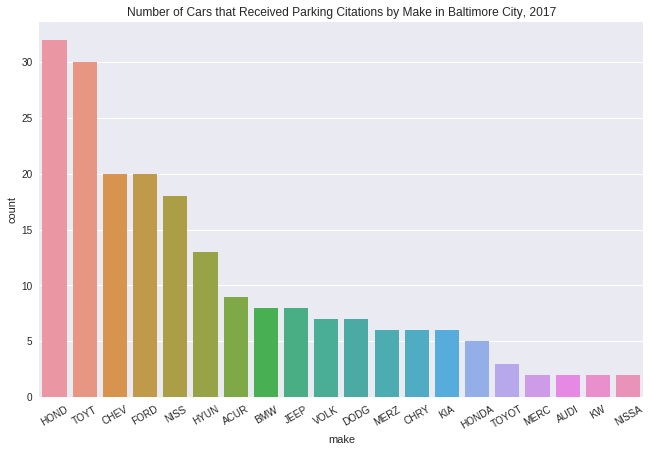

In [49]:
#make a bar graph

g=sns.factorplot(x='make', #here we define the x-axis with the Column Title; here we're looking at the number of each Make
               data=df_2017, #here we define which dataset we are going to use (we created a new dataset above with only 2016 data)
               kind='count', #this is the kind of factorplot we're going to make--counting the number in each category
               order=df_2017.make.value_counts().iloc[:20].index, #here we say that we're only going to plot the top 20 categories 
                 #try to make this graph without the above line to see why we'd do this!
               size=6, #here we resize the graph so that we can see the results better
               aspect=1.5) #play around with the size and aspect to see what might show the data the best!

g.set_xticklabels(rotation=30) #here we rotate the x-axis labels so that we can read the names
plt.title('Number of Cars that Received Parking Citations by Make in Baltimore City, 2017') #here we add a title for the graph

In [0]:
g.savefig("parkingcitations2017.png")